# 线性回归

## 学习之前的困惑

1. 线性回归是啥？
2. 线性回归涉及到的数学问题，我需要掌握哪些？
3. 当我掌握个差不多，写写代码看看怎么回事

------

## 1. 线性回归是啥

> 我的内心想法：顾名思义，找到一条线，这条线可以代表数据中，一组特征和他们对应的结果的关系。  
> 直线方程可以表示为： y=ax+b （当然了 这是一定是理想中的理想状态）  
> 假设我们找到了这个方程 y=ax+b, 则每一个 x 都有一个对应的 y, 也就是说 其预测值为 y  
> 而我们预测出来的这个y 应该和 它 本身对应的真实 y 尽可能的小，也就意味着我们预测的结果更加准确
> 如何知道他们的差距？y(r) - y(p) ？ abs（y(r) - y(p)）?  
> 第一种不行，正负。第二种不行，x不是处处可导，因此 $d = (y - y(预测)) ^ 2$   

> 因此 $dm = \sum\limits_{i=1}^{m}(yi - y(预测)i)^2$ 又因为 y（预测）= ax+b, 所以 $dm = \sum\limits_{i=1}^{m}(y_i - ax_i - b)^2$  
> 我们要让dm尽可能的小，因此，我们要找到 a和b的值 使得dm的值尽可能的小 这样才预测的准确   
> 因为我们要让dm尽可能的小，所以dm代表的函数 在机器学习中称为 “损失函数”，如果我想让dm尽可能大，那它就被称为 “效用函数”  
> 在机器学习中，我们通过分析问题，确定损失函数/效用函数 -> 目标函数  
> 通过 最优化损失函数/效用函数（他们的参数） 来获取机器学习模型  


## 2. 关于最小二乘法

> 因为dm表示的是一种损失函数 因此我们将它表示为$J(a, b)$  
> 因为我们要求最小值，我们需要将它认为成数学中求极值问题，接下来我们尝试对 a ， b 进行求导，导数等于0的地方就是函数极值的地方

对a求导： $\frac{J\delta(a, b)}{(\delta a)} = 0$， 对b求导：$\frac{J\delta(a, b)}{(\delta b)} = 0$

### 对b求导相对容易，因为b的前面只有一个-1

$\begin{align}
\frac{J\delta(a, b)}{(\delta b)} & = \sum\limits_{i=1}^{m}(y_i - ax_i - b)^2\\
&=\sum\limits_{i=1}^{m}2(y_i - ax_i - b)(-1) \\
&=\sum\limits_{i=1}^{m}(y_i - ax_i - b) \\
&=\sum\limits_{i=1}^{m}y_i - \sum\limits_{i=1}^{m}ax_i - \sum\limits_{i=1}^{m}b \\
&=\sum\limits_{i=1}^{m}y_i - \sum\limits_{i=1}^{m}ax_i -mb \\
&=\bar y - a \bar x -b
\end{align}$  

所以 $b=\bar y - a \bar x$

### 然后我们对a进行求导

$\begin{align}
\frac{J\delta(a, b)}{(\delta a)} & = \sum\limits_{i=1}^{m}(y_i - ax_i - b)^2\\
&=\sum\limits_{i=1}^{m}2(y_i - a - b)(-x_i) \\
&=\sum\limits_{i=1}^{m}(y_i - ax_i - b)(x_i) \\
\end{align}$  

 因为 $b=\bar y - a \bar x$  
 

$\begin{align}
\frac{J\delta(a, b)}{(\delta a)} &= \sum\limits_{i=1}^{m}(y_i - ax_i - b)(x_i) \\
& = \sum\limits_{i=1}^{m}(y_i - ax_i - \bar y + a \bar x)x_i \\
& = \sum\limits_{i=1}^{m}x_iy_i - a(x_i)^2 - \bar yx_i + a \bar xx_i \\
& = \sum\limits_{i=1}^{m}x_iy_i- \bar yx_i - a(x_i)^2 + a \bar xx_i \\
& = \sum\limits_{i=1}^{m}(x_iy_i- \bar yx_i) - \sum\limits_{i=1}^{m}(a(x_i)^2 - a \bar xx_i) \\ 
& = \sum\limits_{i=1}^{m}(x_iy_i- \bar yx_i) - a\sum\limits_{i=1}^{m}((x_i)^2 -  \bar xx_i) \\ 
\end{align}$

所以  
$\begin{align}
a & = \frac{\sum\limits_{i=1}^{m}(x_iy_i- \bar yx_i)}{\sum\limits_{i=1}^{m}((x_i)^2 -  \bar xx_i)}\\
\end{align}$

因为   
$\begin{align}
\sum\limits_{i=1}^{m}\bar yx_i &= \bar y\sum\limits_{i=1}^{m}x_i\\
& = m\bar y  \bar x \\
& = \bar x \sum\limits_{i=1}^{m}y_i
\end{align}$  
  
又因为  
$\begin{align}
m\bar y  \bar x &= \sum\limits_{i=1}^{m}\bar x \bar y\\
\end{align}$  

所以  
$\begin{align}
a &= \frac{\sum\limits_{i=1}^{m}(x_iy_i- \bar yx_i)}{\sum\limits_{i=1}^{m}((x_i)^2 -  \bar xx_i)}\\
& = \frac{\sum\limits_{i=1}^{m}(x_iy_i- \bar yx_i - \bar xy_i + \bar x \bar y)}{\sum\limits_{i=1}^{m}((x_i)^2 -  \bar xx_i - \bar xx_i + \bar x^2}\\
& = \frac{\sum\limits_{i=1}^{m}(x^2 - \bar x)(y^2 - \bar y)}{\sum\limits_{i=1}^{m}(x_i - \bar x)^2}
\end{align}$ 


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([1., 2., 3., 4., 5.])
y = np.array([1., 3., 2., 3., 5.])

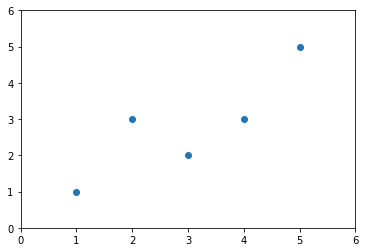

In [3]:
plt.scatter(x, y)
plt.axis([0, 6, 0, 6])
plt.show()

$ a = \frac{\sum\limits_{i=1}^{m}(x_i - \bar x)(y_i - \bar y)}{\sum\limits_{i=1}^{m}(x_i - \bar x)^2}    b=\bar y - a \bar x$

In [4]:
x_mean = np.mean(x) # 计算x的均值
y_mean = np.mean(y) # 计算y的均值

In [5]:
num = 0.0 # 分子部分
d = 0.0 # 分母部分
for x_i, y_i in zip(x, y): # 把xy放一起
    num += (x_i - x_mean) * (y_i - y_mean)
    d += (x_i - x_mean) ** 2

In [6]:
a = num/d # a的值

In [7]:
b = y_mean - a * x_mean # b 的 值

In [8]:
y_hat = a * x + b

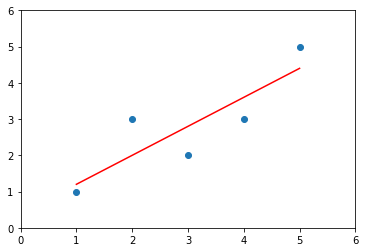

In [9]:
plt.scatter(x, y)
plt.plot(x, y_hat, color='r') # 用上面设定好的的 x， 新的 y
plt.axis([0, 6, 0, 6])
plt.show() # 和上面比一比

In [10]:
x_predict = 6
y_predict = a * x_predict + b
y_predict

5.2

1. 损失函数： 应该尽可能的小
2. 效用函数： 应该尽可能的大

In [11]:
from playml.SimpleLinearRegression import SimpleLinearRegression1

In [12]:
reg1 = SimpleLinearRegression1()
reg1.fit(x, y)


SimpleLinearRegression1()

In [13]:
reg1.predict(np.array([x_predict]))

array([5.2])

In [14]:
reg1.a_

0.8

In [15]:
reg1.b_

0.39999999999999947

In [16]:
y_hat1 = reg1.predict(np.array(x))

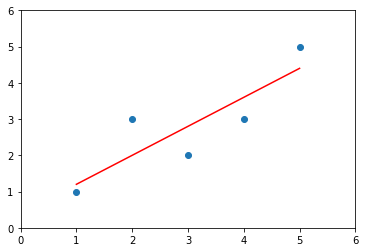

In [17]:
plt.scatter(x, y)
plt.plot(x, y_hat1, color='r')
plt.axis([0, 6, 0, 6])
plt.show() # 和上面比一比

$ a = \frac{\sum\limits_{i=1}^{m}(x_i - \bar x)(y_i - \bar y)}{\sum\limits_{i=1}^{m}(x_i - \bar x)^2}$

  
$ \sum\limits_{i=1}^{m}W_i V_i $

### 两个向量之间进行 · 乘运算，相当于把每个向量的元素进行相乘再相加

### 向量化计算版本 线性回归

In [18]:
from playml.SimpleLinearRegression import SimpleLinearRegression2

In [19]:
reg2 = SimpleLinearRegression2()
reg2.fit(x, y)


SimpleLinearRegression2()

In [20]:
reg2.predict(np.array([x_predict]))

array([5.2])

In [21]:
reg2.a_

0.8

In [22]:
reg2.b_

0.39999999999999947

In [23]:
y_hat2 = reg1.predict(np.array(x))

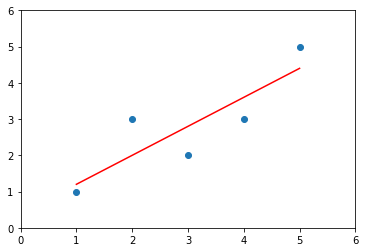

In [24]:
plt.scatter(x, y)
plt.plot(x, y_hat2, color='r')
plt.axis([0, 6, 0, 6])
plt.show() # 和上面比一比

### 向量化性能测试

In [25]:
m = 1000000
big_x = np.random.random(size=m)
big_y = big_x * 2 + 3 + np.random.normal(size=m) # 生成噪音
%timeit reg1.fit(big_x, big_y)
%timeit reg2.fit(big_x, big_y)

1.25 s ± 53.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
7.21 ms ± 59.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [26]:
reg1.a_

1.9991684457189098

In [27]:
reg1.b_

3.0019601197014865

In [28]:
reg2.a_

1.9991684457187946

In [29]:
reg2.b_

3.001960119701544

## 衡量回归算法的标准，MSE vs MAE

> 上次我写的KNN里，是如何衡量模型好坏的？  
> 我用预测集的预测结果 对应真实结果，判断正确率  
> 同理，在这里我也可以将数据2:8分成训练和测试数据集   
> 衡量标准： $\sum\limits_{i=1}^{m}(y_(test)i - ax_(test)i + b)^2$   
> 但是 这里又一个影响的关键因素： **m**  

### MSE (mean square error)： 均方误差 $\frac{1}{m}\sum\limits_{i=1}^{m}(y_(test)i - ax_(test)i + b)^2$  

### RMSE( root mean square error) 均方根误差 去量纲  $\sqrt{\frac{1}{m}\sum\limits_{i=1}^{m}(y_(test)i - ax_(test)i + b)^2 }$

### MAE(mean Absoulte error) 平均绝对误差 $\frac{1}{m}\sum\limits_{i=1}^{m}|(y_(test)i - ax_(test)i + b)^2|$ 

### 波士顿房产

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [31]:
boston = datasets.load_boston() # 手头没有数据，来个博士顿房产数据

In [32]:
boston.keys() # 看看有哪些可以用的东西

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [62]:
print(boston.DESCR) # 先看看数据介绍

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [63]:
boston.feature_names # 看到哪个RM没 就用它了

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [65]:
x = boston.data[:,5] # 只使用房间数量这个特征 所有行只取第五列

In [64]:
x.shape # 发现有 506个样本

(490,)

In [37]:
y = boston.target

In [38]:
y.shape

(506,)

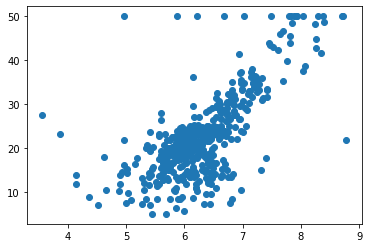

In [39]:
plt.scatter(x, y)
plt.show()

In [40]:
np.max(y)

50.0

In [41]:
x = x[y < 50.0]
y = y[y < 50.0]

In [42]:
x.shape

(490,)

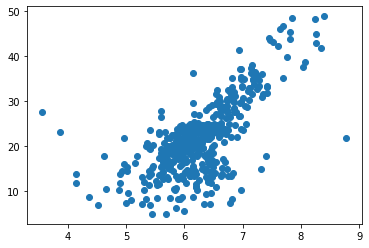

In [43]:
plt.scatter(x, y)
plt.show()

In [44]:
from playml.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, seed=666)

In [45]:
x_train.shape

(392,)

In [46]:
y_train.shape

(392,)

In [47]:
x_test.shape

(98,)

In [48]:
y_test.shape

(98,)

In [66]:
from playml.SimpleLinearRegression import SimpleLinearRegression2

In [67]:
reg = SimpleLinearRegression()
reg.fit(x_train, y_train)

SimpleLinearRegression()

In [68]:
reg.a_

7.8608543562689555

In [69]:
reg.b_

-27.459342806705543

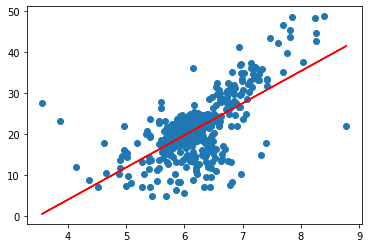

In [70]:
plt.scatter(x_train, y_train)
plt.plot(x_train, reg.predict(x_train), color='r')
plt.show()

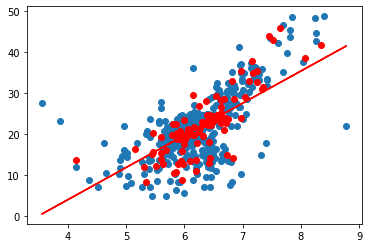

In [71]:
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test, color="r")
plt.plot(x_train, reg.predict(x_train), color='r')
plt.show()

In [60]:
y_predict = reg.predict(x_test)

### MSE

In [57]:
mse_test = np.sum((y_predict - y_test)**2) / len(y_test)
mse_test

24.156602134387438

### RMSE

In [58]:
from math import sqrt

rmse_test = sqrt(mse_test)
rmse_test

4.914936635846635

### MAE

In [61]:
mae_test = np.sum(np.absolute(y_predict - y_test))/len(y_test)
mae_test

3.5430974409463873

### 发现 RMSE 和 MAE 不一样 为啥？